<a href="https://colab.research.google.com/github/prabhashkumar289/Project/blob/main/Spam_Message_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spam Message Classification

**1) Data Processing**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('spam.tsv', sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df['label'].value_counts() / len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [ ]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
data = ham.append(spam, ignore_index=True)

In [ ]:
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [ ]:
data.head()

,label,message,length,punct
0,ham,"Wn u r hurt by d prsn who s close 2 u, do figh...",152,6
1,ham,Are you not around or just still asleep? :V,43,2
2,ham,I emailed yifeng my part oredi.. Can ü get it ...,54,4
3,ham,Yo dude guess who just got arrested the other day,49,0
4,ham,Ill be there on &lt;#&gt; ok.,31,6


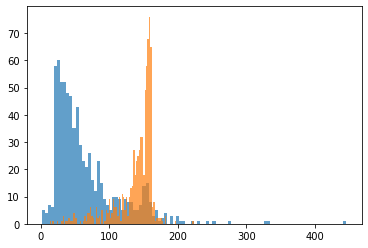

In [ ]:
plt.hist(data[data['label'] == 'ham']['length'] ,bins= 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'] ,bins= 100, alpha = 0.7)
plt.show()

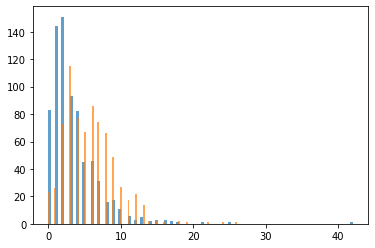

In [ ]:
plt.hist(data[data['label'] == 'ham']['punct'] ,bins= 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'] ,bins= 100, alpha = 0.7)
plt.show()

In [ ]:
data

,label,message,length,punct
0,ham,"Wn u r hurt by d prsn who s close 2 u, do figh...",152,6
1,ham,Are you not around or just still asleep? :V,43,2
2,ham,I emailed yifeng my part oredi.. Can ü get it ...,54,4
3,ham,Yo dude guess who just got arrested the other day,49,0
4,ham,Ill be there on &lt;#&gt; ok.,31,6
...,...,...,...,...
1489,spam,Congratulations ur awarded 500 of CD vouchers ...,115,1
1490,spam,"Hi this is Amy, we will be sending you a free ...",137,5
1491,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...,150,6
1492,spam,U can WIN £100 of Music Gift Vouchers every we...,159,5


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3,random_state = 0, shuffle = True)

In [ ]:
1494 * 0.3

448.2

In [ ]:
x_train.shape

(1045,)

In [ ]:
x_test.shape

(449,)

**2) Building the Model(Random Forest)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [ ]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

**3) Predicting the Results (Random Forest)**

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_test, y_pred

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.9755011135857461

In [ ]:
0.9755011135857461 * 449

438.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[227,   0],
       [ 11, 211]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       227
        spam       1.00      0.95      0.97       222

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449



**4) Building the Model(SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [ ]:
svm.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

**5) Predicting the Results SVM)**

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [ ]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 28, 194]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       227
        spam       0.99      0.87      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.93      0.94       449
weighted avg       0.94      0.94      0.94       449



In [1]:
# Now testing on some sentences bcz I have train out data so it will cheke which massage is spam or ham

In [ ]:
test1 = ['Hello, You are learning natural Language processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulation, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
obj = ['Congratulation..!! Your Loan Amount for Rs.90000.00 Is Successfully Approved Check Your Loan Status lvO.me/14srkr7']

In [ ]:
print(classifier.predict(obj))

['ham']


In [ ]:
print(svm.predict(obj))

['ham']


In [ ]:
obj2 = ['Dear 1234567890 Get Rs.5500 BONUS in your Account On the First Deposit Register for Free va.pcb3.in/KFvbY']

In [ ]:
print(svm.predict(obj2))

['spam']


In [ ]:
print(classifier.predict(obj2))

['spam']


In [ ]:
obj3 = ['Congratulation, Rs.5500 in Your Rummy Account Play Rummy Now & Win Register for Free w2d.me/1224qek']

In [ ]:
print(classifier.predict(obj3))

['spam']


In [ ]:
print(svm.predict(obj3))

['spam']


In [3]:
# we can check more message 
# End